<a href="https://colab.research.google.com/github/ellie456789/STA365HW/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2

/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc.stats.convergence:There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


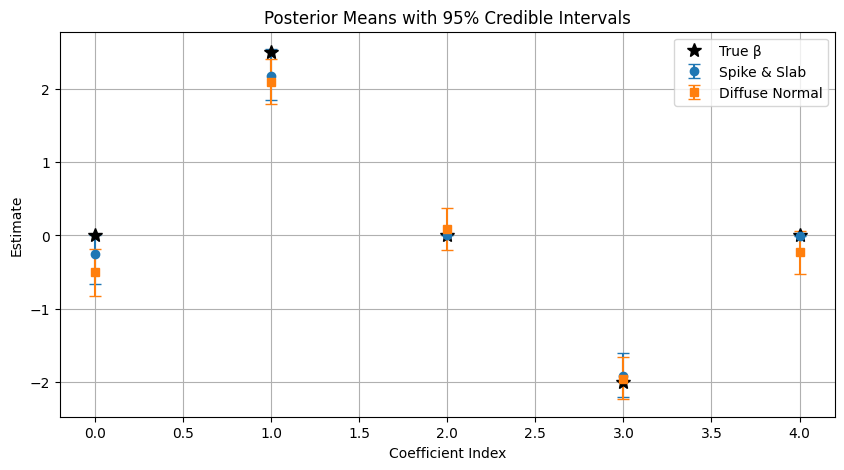

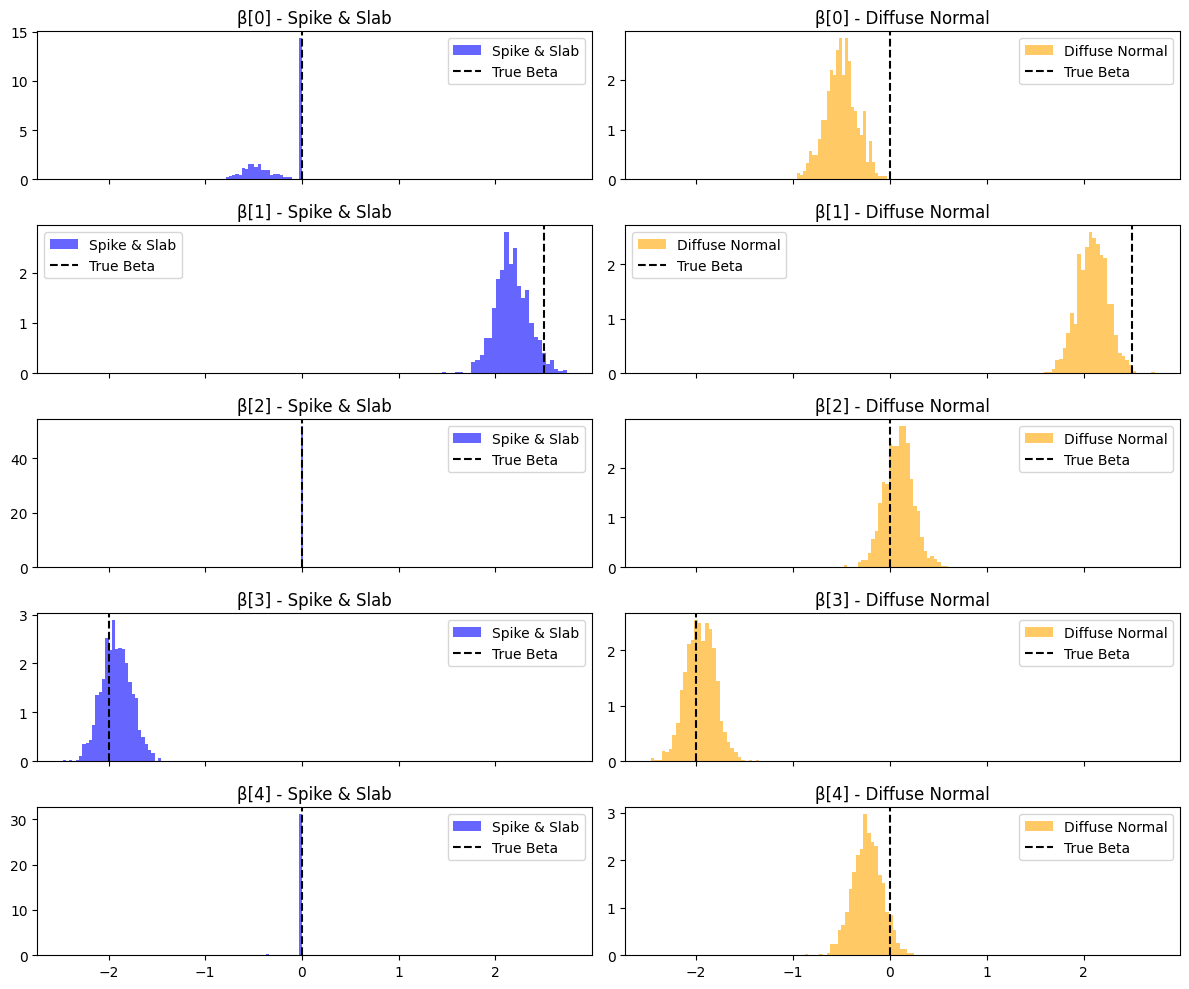

<ipython-input-2-d3ebc1a4a8d9>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


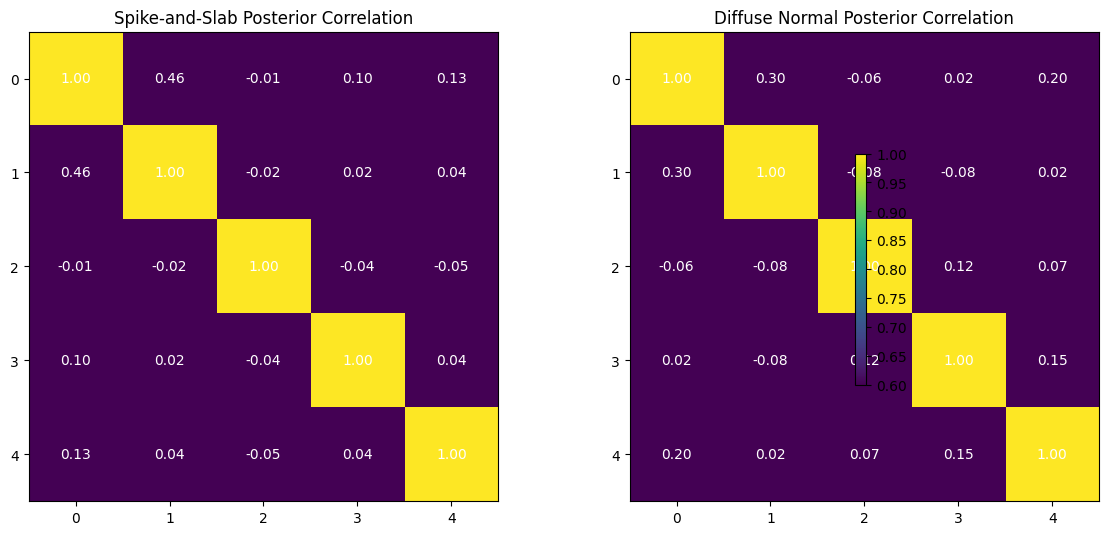

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

#data
np.random.seed(42)
n, p = 50, 5
beta_true = np.zeros(p)
beta_true[[1, 3]] = [2.5, -2.0]
X = np.random.normal(0, 1, size=(n, p))
y = X @ beta_true + np.random.normal(0, 1, size=n)
X = (X - X.mean(axis=0)) / X.std(axis=0)

#Spike-and-Slab regression
with pm.Model() as model_spike_slab:
    p_inclusion = pm.Beta("p", alpha=1, beta=1)
    spike = pm.Bernoulli("spike", p=p_inclusion, shape=p)
    slab = pm.Normal("slab", mu=0, sigma=10, shape=p)
    beta = pm.Deterministic("beta", spike * slab)
    mu = pm.math.dot(X, beta)
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    idata_spike = pm.sample(draws=500, tune=500, chains=2, cores=1, target_accept=0.9, progressbar=False)

#Normal prior regression
with pm.Model() as model_diffuse:
    beta_diff = pm.Normal("beta", mu=0, sigma=10, shape=p)
    mu_diff = pm.math.dot(X, beta_diff)
    sigma_diff = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu_diff, sigma=sigma_diff, observed=y)
    idata_diffuse = pm.sample(draws=500, tune=500, chains=2, cores=1, target_accept=0.9, progressbar=False)

#summary
spike_summary = az.summary(idata_spike, var_names=["beta"], hdi_prob=0.95)
diffuse_summary = az.summary(idata_diffuse, var_names=["beta"], hdi_prob=0.95)

spike_yerr = np.abs(np.vstack([
    spike_summary["mean"] - spike_summary["hdi_2.5%"],
    spike_summary["hdi_97.5%"] - spike_summary["mean"]
]))

diffuse_yerr = np.abs(np.vstack([
    diffuse_summary["mean"] - diffuse_summary["hdi_2.5%"],
    diffuse_summary["hdi_97.5%"] - diffuse_summary["mean"]
]))

plt.figure(figsize=(10, 5))
plt.errorbar(range(p), spike_summary["mean"], yerr=spike_yerr, fmt='o', label='Spike & Slab', capsize=4)
plt.errorbar(range(p), diffuse_summary["mean"], yerr=diffuse_yerr, fmt='s', label='Diffuse Normal', capsize=4)
plt.plot(range(p), beta_true, 'k*', label='True \u03b2', markersize=10)
plt.title("Posterior Means with 95% Credible Intervals")
plt.xlabel("Coefficient Index")
plt.ylabel("Estimate")
plt.grid(True)
plt.legend()
plt.show()

# density plots
beta_spike_samples = idata_spike.posterior["beta"].values.reshape(-1, p)
beta_diffuse_samples = idata_diffuse.posterior["beta"].values.reshape(-1, p)

fig, axes = plt.subplots(p, 2, figsize=(12, 2 * p), sharex='col')
for i in range(p):
    axes[i, 0].hist(beta_spike_samples[:, i], bins=30, density=True, alpha=0.6, color='blue', label='Spike & Slab')
    axes[i, 0].axvline(beta_true[i], color='k', linestyle='--', label='True Beta')
    axes[i, 0].set_title(f"\u03b2[{i}] - Spike & Slab")
    axes[i, 0].legend()

    axes[i, 1].hist(beta_diffuse_samples[:, i], bins=30, density=True, alpha=0.6, color='orange', label='Diffuse Normal')
    axes[i, 1].axvline(beta_true[i], color='k', linestyle='--', label='True Beta')
    axes[i, 1].set_title(f"\u03b2[{i}] - Diffuse Normal")
    axes[i, 1].legend()
fig.tight_layout()
plt.show()

# correlation matrices
R_spike = np.corrcoef(beta_spike_samples.T)
R_diffuse = np.corrcoef(beta_diffuse_samples.T)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, (matrix, title) in enumerate(zip([R_spike, R_diffuse], ["Spike-and-Slab Posterior Correlation", "Diffuse Normal Posterior Correlation"])):
    im = ax[i].imshow(matrix, vmin=0.6, vmax=1)
    ax[i].set_title(title)
    for j in range(p):
        for k in range(p):
            ax[i].text(k, j, f"{matrix[j, k]:.2f}", ha='center', va='center', color='w')
fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()


# Question3

/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc.stats.convergence:There were 177 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:There were 100 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


ValueError: 'yerr' must not contain negative values

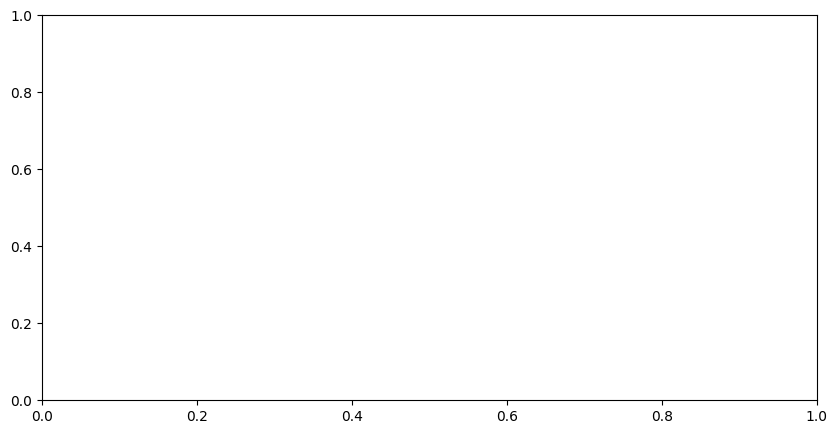

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import pytensor.tensor as at

# Generate synthetic data
np.random.seed(42)
n, p = 50, 5
beta_true = np.zeros(p)
beta_true[[1, 3]] = [2.5, -2.0]
X = np.random.normal(0, 1, size=(n, p))
y = X @ beta_true + np.random.normal(0, 1, size=n)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Spike-and-slab prior model
with pm.Model() as model_spike:
    p_inclusion = pm.Beta("p", alpha=1, beta=1)
    spike = pm.Bernoulli("spike", p=p_inclusion, shape=p)
    slab = pm.Normal("slab", mu=0, sigma=10, shape=p)
    beta = pm.Deterministic("beta", spike * slab)
    mu = pm.math.dot(X, beta)
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    idata_spike = pm.sample(draws=1000, tune=1000, chains=2, target_accept=0.9, progressbar=False)

# Horseshoe prior (Formulation 3 - non-centered)
with pm.Model() as model_horseshoe:
    nu = 1
    r_local = pm.Normal('r_local', mu=0, sigma=1, shape=p)
    rho_local = pm.InverseGamma('rho_local', alpha=0.5 * nu, beta=0.5 * nu, shape=p)
    r_global = pm.Normal('r_global', mu=0, sigma=1)
    rho_global = pm.InverseGamma('rho_global', alpha=0.5, beta=0.5)
    tau = r_global * pm.math.sqrt(rho_global)
    lam = r_local * pm.math.sqrt(rho_local)
    z = pm.Normal('z', mu=0, sigma=1, shape=p)
    beta = pm.Deterministic('beta', z * lam * tau)
    mu = pm.math.dot(X, beta)
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    idata_hs = pm.sample(draws=1000, tune=1000, chains=2, target_accept=0.9, progressbar=False)

# Compare posterior summaries
spike_summary = az.summary(idata_spike, var_names=["beta"], hdi_prob=0.95)
hs_summary = az.summary(idata_hs, var_names=["beta"], hdi_prob=0.95)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(range(p), spike_summary["mean"],
            yerr=[spike_summary["mean"] - spike_summary["hdi_2.5%"],
                  spike_summary["hdi_97.5%"] - spike_summary["mean"]],
            fmt='o', label='Spike & Slab', capsize=4)

ax.errorbar(range(p), hs_summary["mean"],
            yerr=[hs_summary["mean"] - hs_summary["hdi_2.5%"],
                  hs_summary["hdi_97.5%"] - hs_summary["mean"]],
            fmt='s', label='Horseshoe', capsize=4)

ax.plot(range(p), beta_true, 'k*', label='True \u03b2', markersize=10)
ax.set_title("Posterior Means with 95% Credible Intervals")
ax.set_xlabel("Coefficient Index")
ax.set_ylabel("Estimate")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
